<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/HW4/HW4_MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [35]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


#package I will use for constants and units conversion 
import astropy



Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

$$\frac{GMm}{r^2}=\frac{mv^2}{r}$$

The right hand side is $m$ times centripital acceleration.

$$\frac{GM}{r}=v^2$$

## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [0]:
#read the file and skip the first header, to have the columns based on radius, velocity, st.deviaton and error
m31 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv',header= 1, sep = ',')

#rename the column headers 
m31= m31.rename(columns={"#R(kpc":"r","V(km/s)":"v", "St.dev.":"dv" , "St.error":"error"})

In [66]:
m31.head()

,r,v,dv,error
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [39]:
m31.describe()

,r,v,dv,error
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [0]:
apparentSizeM31 = 3.167 #deg
distanceM31 = 778 #kpc
uncertaintyd = 33 #kpc

In [41]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [42]:
#multiply the distance and its uncertainitis by kpc
m31dist = distanceM31 * u.kpc
m31distun =  uncertaintyd * u.kpc
print (m31dist,m31distun)

778.0 kpc 33.0 kpc


To calculate the diamater of M31 use the angular size formula with the small angle approximation:

$$\alpha=\frac{D}{d}$$

Where $\alpha$ is the angle of the apparent size in arcseconds, $D$ is the diamter in AU and $d$ is the distance to the object. The equation results in:

$$D=\alpha d$$

In [78]:
#calculate the diameter by tunring m31angS to arcseconds
m31size = m31dist * m31angS.to(u.arcsecond)
#take the value of the diameter, turn it into AU and then convert into kpc
m31size = (m31size.value * u.kau).to(u.kpc)
m31sizewerr = ((m31dist + m31distun) * m31angS.to(u.arcsecond)).value * u.kau
print("Size of the visible component of Andromeda:{:.2f} ".format(m31size))
print("Size of the visible component of Andromeda with error added:{:.2f} ".format(m31sizewerr.to(u.kpc)))

Size of the visible component of Andromeda:43.00 kpc 
Size of the visible component of Andromeda with error added:44.83 kpc 


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

$$v^2=GM/r\Rightarrow r=GMv^{-2}$$

$$\delta r=\left|\frac{\partial r}{\partial v}\delta v\right|$$

$$\delta r=\left|\frac{-2GM}{v^3}\delta v\right|\qquad\text{and}\qquad M=\frac{v^2 r}{G}$$

$$\delta r=\frac{G\frac{v^2r}{G}}{v^3}\delta v=\frac{2r\delta v}{v}$$

In [44]:
def getradii(gal, gsize, n):
  #define a new column in the data frame with values of teh uncertainty in the radius
  gal['dr'] = 2 * gal.r *gal.dv /gal.v
  #us broadcasting to look for the least value and return it
  stars = gal.where(gal.r > (gsize)/2 * n).dropna()
  output = stars.iloc[0]
  return output

getradii(m31, m31size, 2)  

r         49.222000
v        237.069000
dv       109.381000
error     23.924000
dr        45.420967
Name: 34, dtype: float64

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

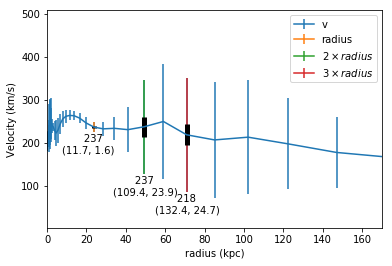

In [45]:
def plotGal(gal,rds):
  pl.errorbar(gal.r,gal.v,yerr=gal.dv)
  pl.xlim((0,170))
  pl.xlabel('radius (kpc)')
  pl.ylabel('Velocity (km/s)')
  for n in [1,2,3]:
    npoint = getradii(gal,rds,n)
    pl.errorbar(npoint.r,npoint.v,yerr=npoint.dv)
    pl.text(npoint.r-16,npoint.v-npoint.dv-50,"       {:0.0f}\n({:0.1f}, {:0.1f})".
            format(npoint.v,npoint.dv,npoint.error))
    
  for n in [1,2,3]:
    npoint = getradii(gal,rds,n)
    pl.errorbar(npoint.r,npoint.v,yerr=npoint.error,color='k',elinewidth=5)
    
    
  pl.legend(('v','radius','$2\\times radius$','$3\\times radius$'))
  


plotGal(m31,m31size)

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

In [0]:
#delete
def vratios(gal, rds, rd, err='dv'):
      ...

In [0]:
# your code here

### Discuss!

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [0]:
#read the file and skip the first header, to have the columns based on radius, velocity, st.deviaton and error
mw = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/mw.csv',header= 1, sep = ',')

#rename the column headers 
mw= mw.rename(columns={"R(kpc)":"r","V(km/s)":"v", "St.dev.":"dv" , "St.error":"error"})

In [71]:
mw.head()

,r,v,dv,error
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [52]:
mw.describe()

,R(kpc),v,dv,error
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249062,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [0]:
apparentSizeMW = 3.167 #deg
distanceMW = 778 #kpc
uncertaintydmw = 33 #kpc

In [54]:
mwangS = apparentSizeMW * u.degree
print("Angular Size of the visible component of the Milky Way: {:.2f}".format(mwangS.to(u.rad)))

Angular Size of the visible component of the Milky Way: 0.06 rad


In [56]:
mwdist = distanceMW * u.kpc
mwdistun =  uncertaintydmw * u.kpc
print (mwdist,mwdistun)

778.0 kpc 33.0 kpc


In [57]:
mwsize = mwdist * mwangS.to(u.arcsecond)
mwsize = mwsize.value * u.kau
mwsizewerr = ((mwdist + mwdistun) * mwangS.to(u.arcsecond)).value * u.kau
mwsize = mwsize.to(u.kpc)
print("Size of the visible component of Andromeda:{:.2f} ".format(mwsize))
print("Size of the visible component of Andromeda with error added:{:.2f} ".format(mwsizewerr.to(u.kpc)))

Size of the visible component of Andromeda:43.00 kpc 
Size of the visible component of Andromeda with error added:44.83 kpc 


In [72]:
getradii(mw, mwsize, 2) 

r         43.887000
v        195.333000
dv        68.490000
error     24.316000
dr        30.776373
Name: 46, dtype: float64

(0, 80)

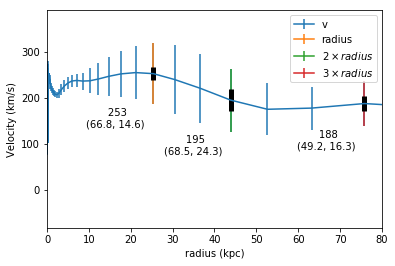

In [77]:
plotGal(mw,mwsize)
pl.xlim(0,80)